# 서울시 구별 CCTV 현황 전처리

서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

<내가 살지역이 안전한가?> 위험지수 = CCTV가 인구대비 과하게 적은지역에 높은 점수를 부과 + 경찰서 범죄 비율 

In [2]:
import pandas as pd

In [3]:
CCTV_Seoul = pd.read_csv(r"C:\Users\LG\Desktop\공모전\data\서울시 자치구 연도별 방범용 CCTV 운영 현황_230630기준.csv", 
                         encoding='cp949')
CCTV_Seoul.head()

,Unnamed: 0,구분,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,1,종로구,935,"1,066","1,225","1,322","1,327","1,510","1,573","1,812","1,808"
1,2,중구,363,565,838,"1,174","1,242","1,482","1,911","2,026","2,026"
2,3,용산구,"1,398","1,689","1,831","1,888","1,915","2,058","2,321","2,531","2,647"
3,4,성동구,"1,089","1,328","2,103","2,390","2,833","3,162","3,519","3,627","3,643"
4,5,광진구,638,657,"1,112","1,586","2,308","2,481","3,111","3,370","3,359"


In [4]:
CCTV_Seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25 non-null     int64 
 1   구분          25 non-null     object
 2   2015년       25 non-null     object
 3   2016년       25 non-null     object
 4   2017년       25 non-null     object
 5   2018년       25 non-null     object
 6   2019년       25 non-null     object
 7   2020년       25 non-null     object
 8   2021년       25 non-null     object
 9   2022년       25 non-null     object
 10  2023년       25 non-null     object
dtypes: int64(1), object(10)
memory usage: 2.3+ KB


In [5]:
CCTV_Seoul.columns

Index(['Unnamed: 0', '구분', '2015년', '2016년', '2017년', '2018년', '2019년',
       '2020년', '2021년', '2022년', '2023년'],
      dtype='object')

In [6]:
CCTV_Seoul.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
CCTV_Seoul

,구분,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,935,"1,066","1,225","1,322","1,327","1,510","1,573","1,812","1,808"
1,중구,363,565,838,"1,174","1,242","1,482","1,911","2,026","2,026"
2,용산구,"1,398","1,689","1,831","1,888","1,915","2,058","2,321","2,531","2,647"
3,성동구,"1,089","1,328","2,103","2,390","2,833","3,162","3,519","3,627","3,643"
4,광진구,638,657,"1,112","1,586","2,308","2,481","3,111","3,370","3,359"
5,동대문구,"1,202","1,425","1,535","1,775","2,061","2,166","2,471","2,592","2,592"
6,중랑구,751,898,"1,047","1,203","2,250","3,165","3,592","3,856","3,856"
7,성북구,"1,035","1,534","1,940","2,542","3,238","3,440","3,815","4,014","4,129"
8,강북구,608,840,841,"1,159","1,656","2,337","2,960","3,184","3,184"
9,도봉구,345,443,542,679,835,"1,189","1,684","1,994","2,120"


In [8]:
CCTV_Seoul.dropna(axis=0, inplace=True)
CCTV_Seoul

,구분,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,935,"1,066","1,225","1,322","1,327","1,510","1,573","1,812","1,808"
1,중구,363,565,838,"1,174","1,242","1,482","1,911","2,026","2,026"
2,용산구,"1,398","1,689","1,831","1,888","1,915","2,058","2,321","2,531","2,647"
3,성동구,"1,089","1,328","2,103","2,390","2,833","3,162","3,519","3,627","3,643"
4,광진구,638,657,"1,112","1,586","2,308","2,481","3,111","3,370","3,359"
5,동대문구,"1,202","1,425","1,535","1,775","2,061","2,166","2,471","2,592","2,592"
6,중랑구,751,898,"1,047","1,203","2,250","3,165","3,592","3,856","3,856"
7,성북구,"1,035","1,534","1,940","2,542","3,238","3,440","3,815","4,014","4,129"
8,강북구,608,840,841,"1,159","1,656","2,337","2,960","3,184","3,184"
9,도봉구,345,443,542,679,835,"1,189","1,684","1,994","2,120"


In [9]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,935,"1,066","1,225","1,322","1,327","1,510","1,573","1,812","1,808"
1,중구,363,565,838,"1,174","1,242","1,482","1,911","2,026","2,026"
2,용산구,"1,398","1,689","1,831","1,888","1,915","2,058","2,321","2,531","2,647"
3,성동구,"1,089","1,328","2,103","2,390","2,833","3,162","3,519","3,627","3,643"
4,광진구,638,657,"1,112","1,586","2,308","2,481","3,111","3,370","3,359"


# 인구현황데이터

In [10]:
pop_Seoul = pd.read_csv(r"C:\Users\LG\Desktop\공모전\data\주민등록인구(월별)_20231031000222.csv",  encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,합계,한국인,외국인
0,2023. 09,소계,4475726,9655918,9407540,248378
1,2023. 09,종로구,72304,151127,139945,11182
2,2023. 09,중구,64609,131825,121405,10420
3,2023. 09,용산구,109360,230692,216152,14540
4,2023. 09,성동구,133366,285543,278366,7177


In [11]:
pop_Seoul = pop_Seoul.drop('기간', axis=1)
pop_Seoul

,자치구,세대,합계,한국인,외국인
0,소계,4475726,9655918,9407540,248378
1,종로구,72304,151127,139945,11182
2,중구,64609,131825,121405,10420
3,용산구,109360,230692,216152,14540
4,성동구,133366,285543,278366,7177
5,광진구,170388,351959,336604,15355
6,동대문구,173091,359113,341238,17875
7,중랑구,187900,387940,382797,5143
8,성북구,197607,440089,427671,12418
9,강북구,144269,294804,290155,4649


In [12]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', pop_Seoul.columns[1] : '인구수'}, inplace=True)
pop_Seoul.head()

,구별,인구수,합계,한국인,외국인
0,소계,4475726,9655918,9407540,248378
1,종로구,72304,151127,139945,11182
2,중구,64609,131825,121405,10420
3,용산구,109360,230692,216152,14540
4,성동구,133366,285543,278366,7177


# CCTV 데이터 파악하기

In [13]:
CCTV_Seoul.head()

,구별,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,935,"1,066","1,225","1,322","1,327","1,510","1,573","1,812","1,808"
1,중구,363,565,838,"1,174","1,242","1,482","1,911","2,026","2,026"
2,용산구,"1,398","1,689","1,831","1,888","1,915","2,058","2,321","2,531","2,647"
3,성동구,"1,089","1,328","2,103","2,390","2,833","3,162","3,519","3,627","3,643"
4,광진구,638,657,"1,112","1,586","2,308","2,481","3,111","3,370","3,359"


In [14]:
print(CCTV_Seoul.iloc[:, 1:].dtypes)

2015년    object
2016년    object
2017년    object
2018년    object
2019년    object
2020년    object
2021년    object
2022년    object
2023년    object
dtype: object


In [15]:
columns_to_convert = ['2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2023년']
CCTV_Seoul[columns_to_convert] = CCTV_Seoul[columns_to_convert].replace('[^0-9]', '',
                                                                        regex=True).apply(pd.to_numeric, errors='coerce')


CCTV_Seoul['총계'] = CCTV_Seoul[columns_to_convert].sum(axis=1)

CCTV_Seoul

,구별,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,총계
0,종로구,935,1066,1225,1322,1327,1510,1573,1812,1808,12578
1,중구,363,565,838,1174,1242,1482,1911,2026,2026,11627
2,용산구,1398,1689,1831,1888,1915,2058,2321,2531,2647,18278
3,성동구,1089,1328,2103,2390,2833,3162,3519,3627,3643,23694
4,광진구,638,657,1112,1586,2308,2481,3111,3370,3359,18622
5,동대문구,1202,1425,1535,1775,2061,2166,2471,2592,2592,17819
6,중랑구,751,898,1047,1203,2250,3165,3592,3856,3856,20618
7,성북구,1035,1534,1940,2542,3238,3440,3815,4014,4129,25687
8,강북구,608,840,841,1159,1656,2337,2960,3184,3184,16769
9,도봉구,345,443,542,679,835,1189,1684,1994,2120,9831


In [16]:
columns_to_convert = ['2023년', '2022년', '2021년', '2020년', '2019년', '2018년', '2017년', '2016년', '2015년']
CCTV_Seoul[columns_to_convert] = CCTV_Seoul[columns_to_convert].apply(pd.to_numeric, errors='coerce')

CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2023년'] + CCTV_Seoul['2022년'] + CCTV_Seoul['2021년']) / (CCTV_Seoul['2020년'] + CCTV_Seoul['2019년'] + CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2016년'] + CCTV_Seoul['2015년']) * 100

# Display the top 5 rows with the highest '최근증가율'
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)


,구별,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,총계,최근증가율
9,도봉구,345,443,542,679,835,1189,1684,1994,2120,9831,143.763947
8,강북구,608,840,841,1159,1656,2337,2960,3184,3184,16769,125.359495
6,중랑구,751,898,1047,1203,2250,3165,3592,3856,3856,20618,121.365686
4,광진구,638,657,1112,1586,2308,2481,3111,3370,3359,18622,112.047370
15,강서구,801,960,1164,1386,1858,2346,2637,3151,3209,17512,105.660599


# 서울시 인구데이터 파악

In [17]:
pop_Seoul.head()

,구별,인구수,합계,한국인,외국인
0,소계,4475726,9655918,9407540,248378
1,종로구,72304,151127,139945,11182
2,중구,64609,131825,121405,10420
3,용산구,109360,230692,216152,14540
4,성동구,133366,285543,278366,7177


In [18]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,합계,한국인,외국인
1,종로구,72304,151127,139945,11182
2,중구,64609,131825,121405,10420
3,용산구,109360,230692,216152,14540
4,성동구,133366,285543,278366,7177
5,광진구,170388,351959,336604,15355


In [19]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [20]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,합계,한국인,외국인


In [21]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,합계,한국인,외국인,외국인비율
1,종로구,72304,151127,139945,11182,15.465258
2,중구,64609,131825,121405,10420,16.127784
3,용산구,109360,230692,216152,14540,13.295538
4,성동구,133366,285543,278366,7177,5.381432
5,광진구,170388,351959,336604,15355,9.011785


In [22]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,합계,한국인,외국인,외국인비율
24,송파구,286123,661515,655744,5771,2.016965
21,관악구,286045,500582,485172,15410,5.387264
16,강서구,274249,569978,564339,5639,2.056161
23,강남구,238647,546291,540957,5334,2.235100
11,노원구,218367,504423,499989,4434,2.030527


In [23]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,합계,한국인,외국인,외국인비율
17,구로구,184467,416815,393929,22886,12.406555
19,영등포구,190761,398290,375586,22704,11.901804
6,동대문구,173091,359113,341238,17875,10.326938
21,관악구,286045,500582,485172,15410,5.387264
5,광진구,170388,351959,336604,15355,9.011785


In [24]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,합계,한국인,외국인,외국인비율
2,중구,64609,131825,121405,10420,16.127784
1,종로구,72304,151127,139945,11182,15.465258
3,용산구,109360,230692,216152,14540,13.295538
17,구로구,184467,416815,393929,22886,12.406555
19,영등포구,190761,398290,375586,22704,11.901804


# CCTV 데이터와 인구 데이터 합치고 분석하기

In [25]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
0,종로구,935,1066,1225,1322,1327,1510,1573,1812,1808,12578,70.318213,72304,151127,139945,11182,15.465258
1,중구,363,565,838,1174,1242,1482,1911,2026,2026,11627,105.278955,64609,131825,121405,10420,16.127784
2,용산구,1398,1689,1831,1888,1915,2058,2321,2531,2647,18278,69.570461,109360,230692,216152,14540,13.295538
3,성동구,1089,1328,2103,2390,2833,3162,3519,3627,3643,23694,83.603255,133366,285543,278366,7177,5.381432
4,광진구,638,657,1112,1586,2308,2481,3111,3370,3359,18622,112.047370,170388,351959,336604,15355,9.011785


In [26]:
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['2019년']
del data_result['2020년']
del data_result['2021년']
del data_result['2022년']

data_result.head()

,구별,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
0,종로구,1808,12578,70.318213,72304,151127,139945,11182,15.465258
1,중구,2026,11627,105.278955,64609,131825,121405,10420,16.127784
2,용산구,2647,18278,69.570461,109360,230692,216152,14540,13.295538
3,성동구,3643,23694,83.603255,133366,285543,278366,7177,5.381432
4,광진구,3359,18622,112.047370,170388,351959,336604,15355,9.011785


In [27]:
data_result.set_index('구별', inplace=True)
data_result.head()

,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
구별,,,,,,,,
종로구,1808,12578,70.318213,72304,151127,139945,11182,15.465258
중구,2026,11627,105.278955,64609,131825,121405,10420,16.127784
용산구,2647,18278,69.570461,109360,230692,216152,14540,13.295538
성동구,3643,23694,83.603255,133366,285543,278366,7177,5.381432
광진구,3359,18622,112.047370,170388,351959,336604,15355,9.011785


In [28]:
import numpy as np

np.corrcoef(data_result['외국인비율'],data_result['총계'])

array([[ 1.      , -0.269075],
       [-0.269075,  1.      ]])

In [29]:
np.corrcoef(data_result['인구수'],data_result['총계'])

array([[1.        , 0.45144185],
       [0.45144185, 1.        ]])

In [30]:
data_result.sort_values(by='총계', ascending=False).head(5)

,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
구별,,,,,,,,
강남구,6495,45220,73.343044,238647,546291,540957,5334,2.235100
관악구,4245,28549,73.634594,286045,500582,485172,15410,5.387264
은평구,4103,27373,78.383838,215776,471155,467098,4057,1.880191
구로구,4122,26682,81.448487,184467,416815,393929,22886,12.406555
성북구,4129,25687,87.100299,197607,440089,427671,12418,6.284190


In [31]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
구별,,,,,,,,
송파구,2821,16358,99.196298,286123,661515,655744,5771,2.016965
관악구,4245,28549,73.634594,286045,500582,485172,15410,5.387264
강서구,3209,17512,105.660599,274249,569978,564339,5639,2.056161
강남구,6495,45220,73.343044,238647,546291,540957,5334,2.235100
노원구,2281,15767,74.587532,218367,504423,499989,4434,2.030527


In [32]:
data_result.to_csv(r'C:\Users\LG\Desktop\공모전\data\pop_cctv.csv', index = True)

# CCTV와 인구현황 그래프로 분석하기

In [33]:
import matplotlib.pyplot as plt

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [34]:
data_result.head()

,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율
구별,,,,,,,,
종로구,1808,12578,70.318213,72304,151127,139945,11182,15.465258
중구,2026,11627,105.278955,64609,131825,121405,10420,16.127784
용산구,2647,18278,69.570461,109360,230692,216152,14540,13.295538
성동구,3643,23694,83.603255,133366,285543,278366,7177,5.381432
광진구,3359,18622,112.047370,170388,351959,336604,15355,9.011785


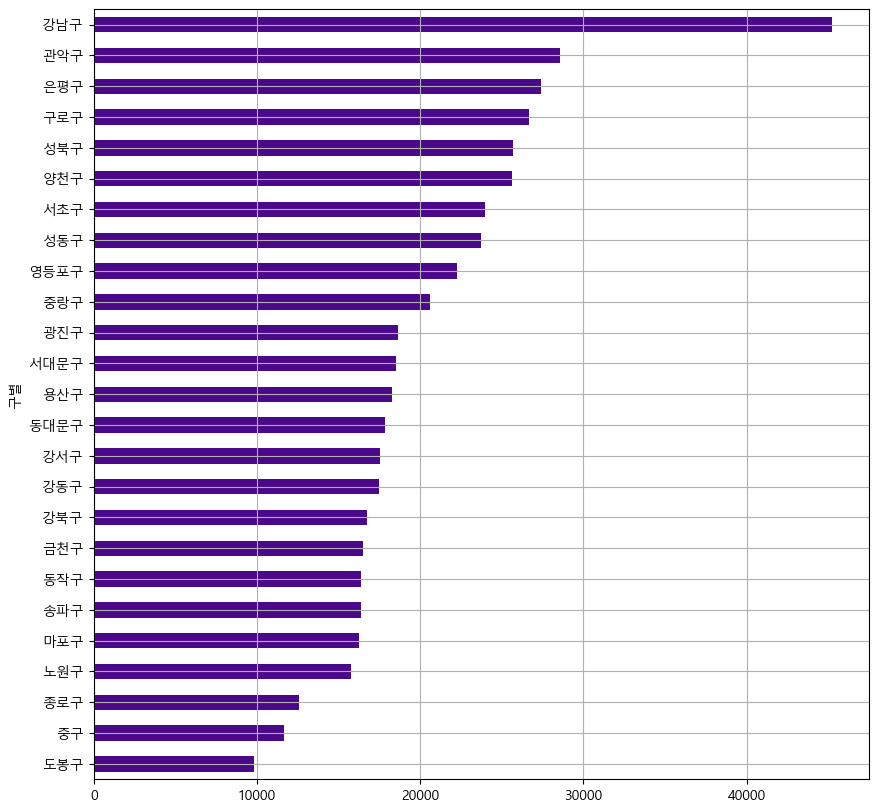

In [35]:
data_result['총계'].sort_values().plot(kind='barh', color='#4B088A', grid=True, figsize=(10,10))
plt.show()

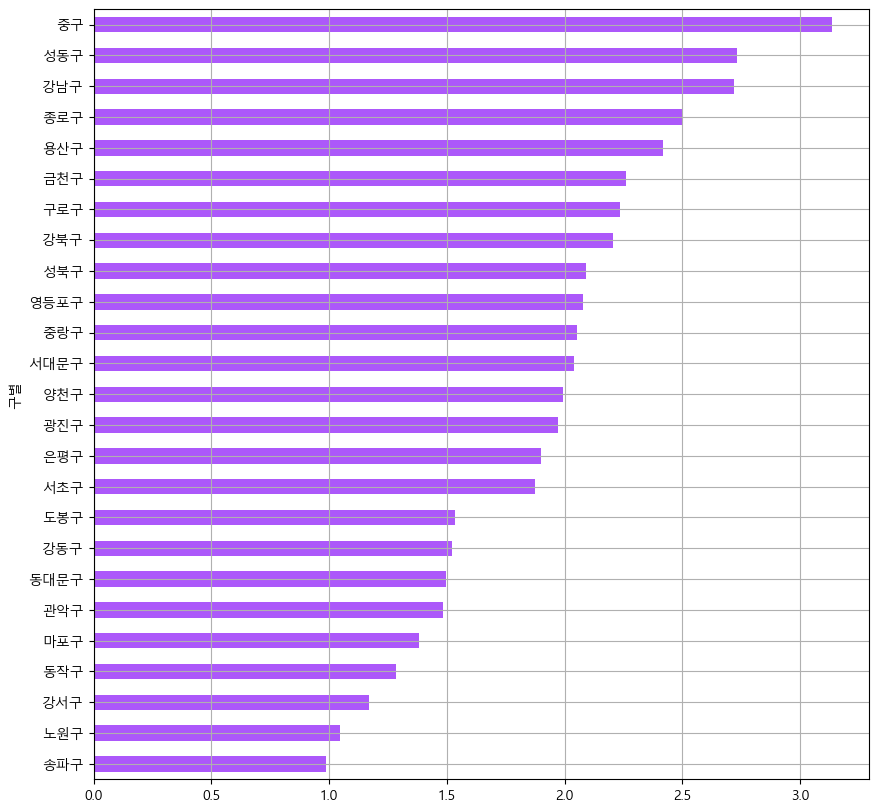

In [36]:
data_result['CCTV비율'] = data_result['2023년'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', color='#AC58FA',
                                         grid=True, figsize=(10,10))
plt.show()

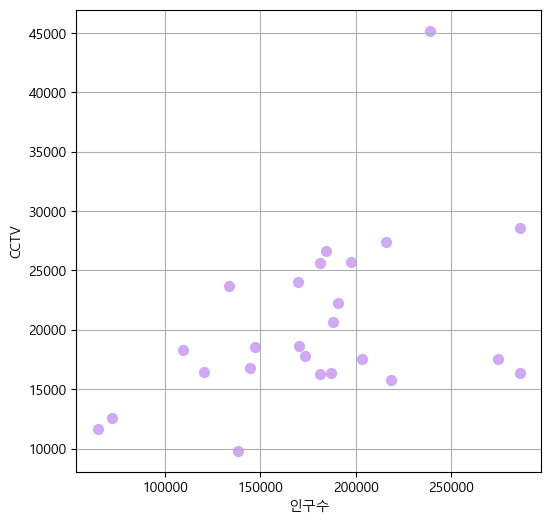

In [37]:
#해당 지역의 인구와 설치된 CCTV 카메라의 수 사이의 상관 관계나 분포를 관찰,
#그 지역의 인구가 많을수록 CCTV 설치 대수가 어떻게 변화하는지, 
#두 변수 간의 양의 상관 관계가 있는지, 음의 상관 관계가 있는지, 아니면 아무런 상관 관계가 없는지

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['총계'],color='#D0A9F5', s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [38]:
# 선형회귀모델


#회귀모델계수, 기울기랑 Y절편 ->데이터에 최적화 직선
fp1 = np.polyfit(data_result['인구수'], data_result['2023년'], 1)
fp1

array([8.58297491e-03, 1.70815824e+03])

In [39]:
# 계수 사용해서 다항식 생성
# 인구수가 100,000에서 700,000 사이에 있는 경우에 대해 다항식 회귀 모델 f1에 따른 y값을 계산

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 좀더 설득력 있게?

In [40]:
# 선형회귀모델
#회귀모델계수, 기울기랑 Y절편 ->데이터에 최적화 직선
fp1 = np.polyfit(data_result['인구수'], data_result['2023년'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

# 실제총계랑 예측총계 사이의 차이의 절대값 계싼
data_result['오차'] = np.abs(data_result['총계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,2023년,총계,최근증가율,인구수,합계,한국인,외국인,외국인비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6495,45220,73.343044,238647,546291,540957,5334,2.235100,2.721593,41463.540545
관악구,4245,28549,73.634594,286045,500582,485172,15410,5.387264,1.484032,24385.724700
은평구,4103,27373,78.383838,215776,471155,467098,4057,1.880191,1.901509,23812.841764
구로구,4122,26682,81.448487,184467,416815,393929,22886,12.406555,2.234546,23390.566126
양천구,3609,25639,70.812791,181072,440591,437401,3190,1.761730,1.993130,22376.705326


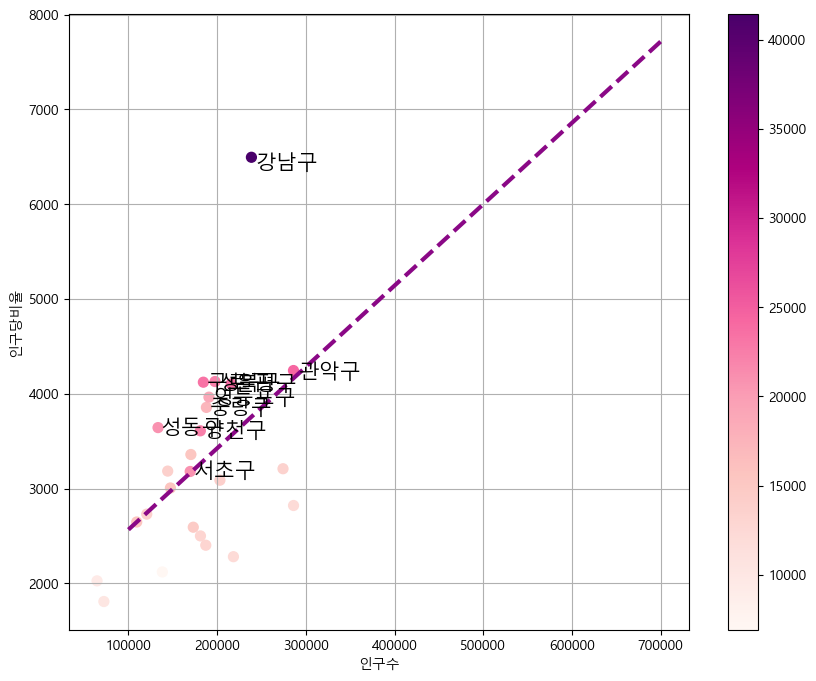

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(data_result['인구수'], data_result['2023년'], 
            c=data_result['오차'], s=50, cmap='RdPu')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='#8A0886')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['2023년'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

위험지수에 들어갈 CCTV 점수를 높게 평가하겠다.